In [1]:
import os

root = "ds_Fionna_Immaculate"
os.makedirs(f"{root}/csv_files", exist_ok=True)
os.makedirs(f"{root}/outputs", exist_ok=True)

print("Project folder created!")


Project folder created!


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

print("Libraries loaded!")


Libraries loaded!


In [22]:
import pandas as pd

ROOT = "ds_Fionna_Immaculate"
CSV_DIR = f"{ROOT}/csv_files"
trade_df = pd.read_csv(f"{CSV_DIR}/historical_data.csv")
print("Loaded trader data!")
display(trade_df.head())
fg_df = pd.read_csv(f"{CSV_DIR}/fear_greed_index.csv")
print("Loaded fear-greed data!")
display(fg_df.head())

Loaded trader data!


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Loaded fear-greed data!


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
df = trade_df.copy()

df.columns = (
    df.columns.str.lower()
              .str.strip()
              .str.replace(" ", "_")
)

df['timestamp_ist'] = pd.to_datetime(df['timestamp_ist'], errors='coerce')
df['date'] = df['timestamp_ist'].dt.date
df['is_win'] = df['closed_pnl'] > 0

df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,is_win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,False


In [10]:
fg = fg_df.copy()

fg.columns = fg.columns.str.lower().str.strip()
fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date
fg['classification'] = fg['classification'].str.lower().str.strip()

fg.head()


,timestamp,value,classification,date
0,1517463000,30,fear,2018-02-01
1,1517549400,15,extreme fear,2018-02-02
2,1517635800,40,fear,2018-02-03
3,1517722200,24,extreme fear,2018-02-04
4,1517808600,11,extreme fear,2018-02-05


In [11]:
daily = df.groupby('date').agg(
    total_trades=('account', 'count'),
    total_pnl=('closed_pnl', 'sum'),
    avg_pnl=('closed_pnl', 'mean'),
    total_volume_usd=('size_usd', 'sum'),
    win_rate=('is_win', 'mean'),
    buy_trades=('side', lambda x: (x == 'BUY').sum() if 'BUY' in x.values else 0),
    sell_trades=('side', lambda x: (x == 'SELL').sum() if 'SELL' in x.values else 0)
).reset_index()

merged = daily.merge(
    fg[['date', 'classification']],
    on='date',
    how='left'
)
merged['classification'] = merged['classification'].fillna("unknown")

merged.head()


,date,total_trades,total_pnl,avg_pnl,total_volume_usd,win_rate,buy_trades,sell_trades,classification
0,2023-01-05,3,0.000000,0.000000,477.00,0.000000,3,0,fear
1,2023-05-12,9,0.000000,0.000000,50005.83,0.000000,7,2,neutral
2,2024-01-01,18,-129.531460,-7.196192,264239.53,0.055556,10,8,greed
3,2024-01-02,6,0.000000,0.000000,2008.18,0.000000,6,0,greed
4,2024-01-03,137,8244.241409,60.176945,472974.70,0.934307,37,100,greed


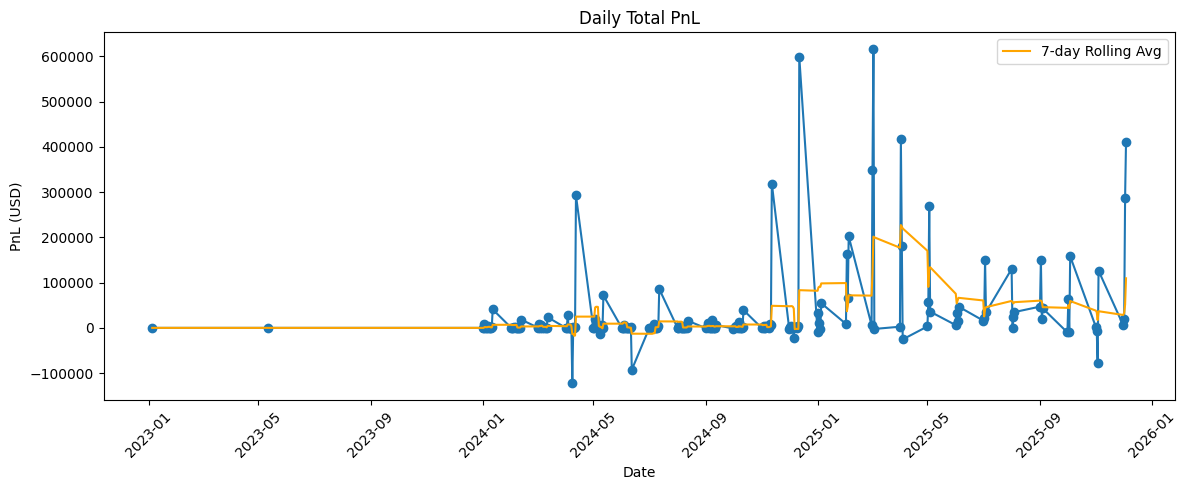

In [14]:
plt.figure(figsize=(12,5))
plt.plot(merged['date'], merged['total_pnl'], marker='o')
plt.title("Daily Total PnL")
plt.xlabel("Date")
plt.ylabel("PnL (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
merged['rolling_pnl'] = merged['total_pnl'].rolling(window=7, min_periods=1).mean()
plt.plot(merged['date'], merged['rolling_pnl'], color='orange', label='7-day Rolling Avg')
plt.legend()
plt.savefig("ds_Fionna_Immaculate/outputs/daily_total_pnl_with_rolling.png")
plt.show()


classification
greed            56
extreme greed    43
fear             37
unknown          30
neutral          16
extreme fear      6
Name: count, dtype: int64
                count          mean            std            min  \
classification                                                      
extreme fear      6.0    733.322758    2798.334049   -2365.961276   
extreme greed    43.0  26904.504083  112472.212014 -122672.000883   
fear             37.0  48087.177910  132965.887414  -25515.678950   
greed            56.0  10886.295226   39493.424342  -92624.643895   
neutral          16.0   4666.046374   10806.052601   -1517.091342   
unknown          30.0  68471.885438  103453.704810  -76880.729036   

                        25%           50%            75%            max  
classification                                                           
extreme fear     -30.534163     64.569420     519.023019    6028.486793  
extreme greed      0.000000    541.554710    1644.563368  599151

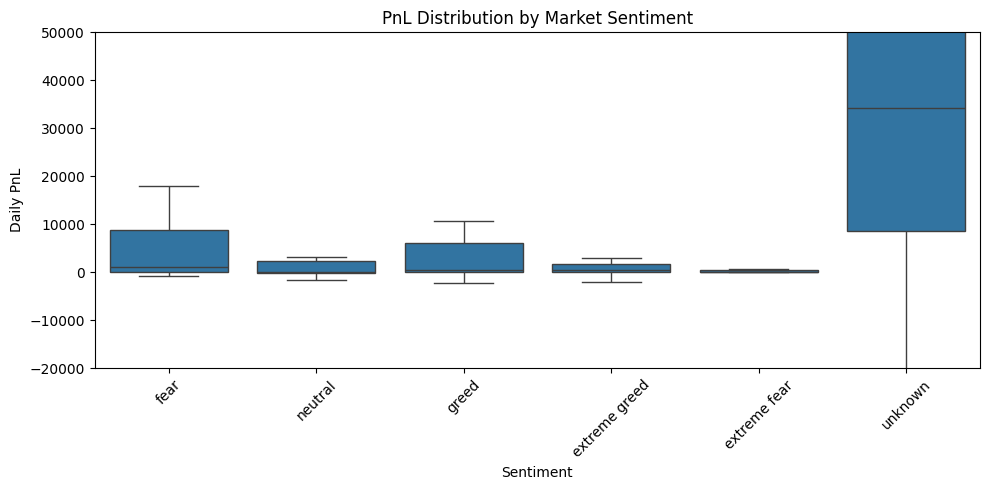

In [19]:
print(merged['classification'].value_counts())
print(merged.groupby('classification')['total_pnl'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(data=merged, x='classification', y='total_pnl', showfliers=False)
plt.title("PnL Distribution by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Daily PnL")
plt.xticks(rotation=45)
plt.ylim(-20000, 50000)
plt.tight_layout()
plt.savefig("ds_Fionna_Immaculate/outputs/pnl_by_sentiment.png")
plt.show()

In [18]:
from scipy.stats import mannwhitneyu

fear_days = merged[merged['classification'].str.contains("fear")]
greed_days = merged[merged['classification'].str.contains("greed")]

stat, p = mannwhitneyu(
    fear_days['total_pnl'],
    greed_days['total_pnl'],
    alternative='two-sided'
)

print("Mann–Whitney U Test")
print("Statistic:", stat)
print("p-value:", p)

Mann–Whitney U Test
Statistic: 2251.0
p-value: 0.5872556732591496


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

merged['profitable'] = (merged['total_pnl'] > 0).astype(int)
features = ['total_trades', 'total_volume_usd', 'win_rate']
X = merged[features]
y = merged['profitable']

if len(merged) > 25:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    model = RandomForestClassifier(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, preds))
    print("ROC AUC:", roc_auc_score(y_test, proba))
    fi = pd.Series(model.feature_importances_, index=features)
    print("\nFeature Importance:")
    print(fi.sort_values(ascending=False))
else:
    print("Not enough data rows for modeling.")

Accuracy: 0.9298245614035088
ROC AUC: 0.800395256916996

Feature Importance:
win_rate            0.503380
total_trades        0.266173
total_volume_usd    0.230447
dtype: float64


In [24]:
!zip -r ds_Fionna_Immaculate.zip ds_Fionna_Immaculate

  adding: ds_Fionna_Immaculate/ (stored 0%)
  adding: ds_Fionna_Immaculate/.ipynb_checkpoints/ (stored 0%)
  adding: ds_Fionna_Immaculate/README.md (deflated 56%)
  adding: ds_Fionna_Immaculate/ds_report.pdf (deflated 14%)
  adding: ds_Fionna_Immaculate/outputs/ (stored 0%)
  adding: ds_Fionna_Immaculate/outputs/daily_total_pnl.png (deflated 9%)
  adding: ds_Fionna_Immaculate/outputs/daily_total_pnl_with_rolling.png (deflated 8%)
  adding: ds_Fionna_Immaculate/outputs/pnl_by_sentiment.png (deflated 19%)
  adding: ds_Fionna_Immaculate/csv_files/ (stored 0%)
  adding: ds_Fionna_Immaculate/csv_files/historical_data.csv (deflated 80%)
  adding: ds_Fionna_Immaculate/csv_files/fear_greed_index.csv (deflated 77%)
